# Global Threshold Analysis (RE)

In [469]:
import numpy as np
import sys, os
sys.path.append(os.path.relpath("../../SciREX_yurun/scirex/predictors"))
sys.path.append(os.path.relpath("../../SciREX_yurun/"))
sys.path.append(os.path.relpath("../../SciREX_yurun/scirex/evaluation_scripts/"))
sys.path.append(os.path.relpath("scirex/evaluation_scripts/"))
from predict_n_ary_relations import *
from scirex_relation_evaluate import *
import argparse
import pandas as pd
import matplotlib.pyplot as plt

In [470]:
thresholds = np.arange(0,1, 0.1)

In [471]:
test_outputs_folder = '../../SciREX_yurun/test_outputs/'

In [472]:
archive_folder = '../../SciREX/outputs_baseline_try/pwc_outputs/experiment_scirex_full/main'
span_file = test_outputs_folder + 'ner_predictions.jsonl'
cluster_file = test_outputs_folder + 'salient_clusters_predictions_using_gold.jsonl'
output_file_base = test_outputs_folder + 'relations_predictions_gold_salient_clusters_{0:.1f}.jsonl'
cuda_device = 0

In [473]:
'''
Generate the predictions,
YORO 
YOU ONLY RUN ONCE :)
'''
# for relation_threshold in thresholds:
#     output_file = output_file_base.format(relation_threshold)
# #     print(output_file)
#     predict(archive_folder, span_file, cluster_file, output_file, cuda_device, relation_threshold)
#     print(output_file)

'\nGenerate the predictions,\nYORO \nYOU ONLY RUN ONCE :)\n'

In [474]:
class Args():
    gold_file='../../SciREX_yurun/scirex_dataset/release_data/test.jsonl'
    ner_file='../../SciREX_yurun/test_outputs/ner_predictions.jsonl'
    clusters_file='../../SciREX_yurun/test_outputs/salient_clusters_predictions_using_gold.jsonl'
    relations_file=''

args=Args()

In [475]:
metrics_list = []
outputs_list = []
for relation_threshold in thresholds:
    output_file = output_file_base.format(relation_threshold)
    outputs_list.append(output_file)
    args.relations_file = output_file
    print("\n\n\n\n=====================Thr: %.1f ====================="%relation_threshold)
    all_metrics = main(args)
    metrics_list.append(all_metrics)






=====================Thr: 0.0 =====================
Salient Clustering Metrics
f1    0.688613
p     0.799200
r     0.630373
Name: mean, dtype: float64
Relation Metrics n=2
p     0.670067
r     0.670977
f1    0.660866
Name: mean, dtype: float64
Relation Metrics n=4
p     0.659640
r     0.697712
f1    0.654466
Name: mean, dtype: float64




=====================Thr: 0.1 =====================
Salient Clustering Metrics
f1    0.688613
p     0.799200
r     0.630373
Name: mean, dtype: float64
Relation Metrics n=2
p     0.670067
r     0.670977
f1    0.660866
Name: mean, dtype: float64
Relation Metrics n=4
p     0.659640
r     0.697712
f1    0.654466
Name: mean, dtype: float64




=====================Thr: 0.2 =====================
Salient Clustering Metrics
f1    0.688613
p     0.799200
r     0.630373
Name: mean, dtype: float64
Relation Metrics n=2
p     0.670067
r     0.670977
f1    0.660866
Name: mean, dtype: float64
Relation Metrics n=4
p     0.659640
r     0.697712
f1    0.654466
Name

In [476]:
# 2-ary-relation
def n_ary_acc(n, item='f1'):
    n_ary_f1s = []
    for idx, relation_threshold in enumerate(thresholds):
        n_ary_f1s.append(metrics_list[idx][n].describe().loc['mean'][[item]].values[0])
    return n_ary_f1s

In [487]:
two_ary_F1s = n_ary_acc(2, item='f1')
four_ary_F1s = n_ary_acc(4, item='f1')

two_ary_ps = n_ary_acc(2, item='p')
four_ary_ps = n_ary_acc(4, item='p')

two_ary_rs = n_ary_acc(2, item='r')
four_ary_rs = n_ary_acc(4, item='r')

# Relation prediction F1 score v.s. threshold

Text(0, 0.5, 'F-1')

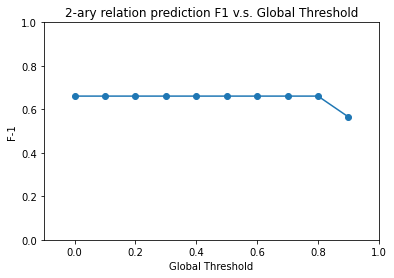

In [488]:
two_ary_F1s = n_ary_acc(2)
plt.plot(thresholds, two_ary_F1s, marker='o')
plt.xlim(-0.1,1.0)
plt.ylim(0,1)
plt.title('2-ary relation prediction F1 v.s. Global Threshold')
plt.xlabel('Global Threshold')
plt.ylabel('F-1')

In [242]:
np.mean(four_ary_ps)

0.649702723357711

In [244]:
np.mean(two_ary_ps)

0.6617836082875391

In [243]:
np.mean(four_ary_rs)

0.6838234809858429

In [245]:
np.mean(two_ary_rs)

0.6605602921422061

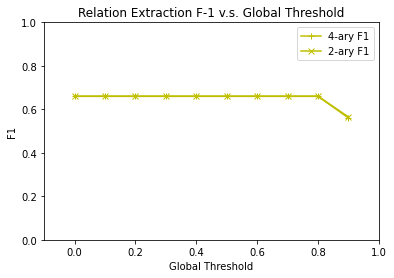

In [489]:
four_ary_F1s = n_ary_F1s(4)
plt.plot(thresholds, four_ary_F1s, marker='+', color='y', label='4-ary F1')
plt.plot(thresholds, two_ary_F1s, marker='x', color='y', label='2-ary F1')

# plt.plot(thresholds, four_ary_ps, marker='+', color='b', label='4-ary precision')
# plt.plot(thresholds, two_ary_ps, marker='x', color='b', label='2-ary precision')

# plt.plot(thresholds, four_ary_rs, marker='+', color='r', label='4-ary recall')
# plt.plot(thresholds, two_ary_rs, marker='x', color='r', label='2-ary recall')
plt.xlim(-0.1,1.0)
plt.ylim(0,1)
plt.title('Relation Extraction F-1 v.s. Global Threshold')
plt.xlabel('Global Threshold')
plt.ylabel('F1')
plt.legend()

# Number of zero predictions v.s. threshold

In [199]:
num_zero = []
outputs_list = [] 
for idx, relation_threshold in enumerate(thresholds):
    output_file = output_file_base.format(relation_threshold)
    outputs = pd.read_json(path_or_buf=output_file, lines=True)
    outputs_list.append(outputs)
    num_zero.append(len(outputs[outputs["predicted_relations"].apply(len) == 0]))

Text(0, 0.5, '# zero predictions')

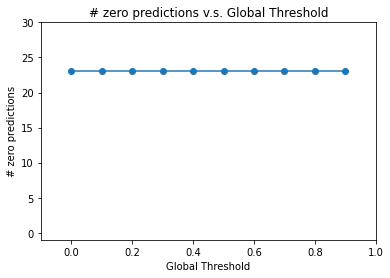

In [41]:
# two_ary_F1s = n_ary_F1s(2)

plt.plot(thresholds, num_zero, marker='o')
plt.xlim(-0.1,1.0)
plt.ylim(-1,30)
plt.title('# zero predictions v.s. Global Threshold')
plt.xlabel('Global Threshold')
plt.ylabel('# zero predictions')

2021-05-13 17:39:24,923:WARNING:No handles with labels found to put in legend.


AttributeError: 'AxesSubplot' object has no attribute 'style'

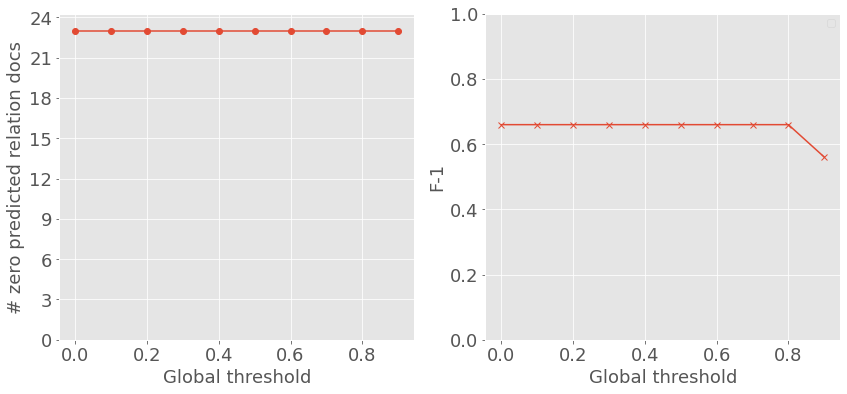

In [607]:
from matplotlib.ticker import MaxNLocator
label_fontsize = 18
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(thresholds, num_zero, marker='o')
axs[0].set_ylabel('# zero predicted relation docs', fontsize=label_fontsize)
axs[0].set_xlabel('Global threshold', fontsize=label_fontsize)
axs[0].tick_params(axis='x', labelsize=label_fontsize)
axs[0].tick_params(axis='y', labelsize=label_fontsize)
axs[1].plot(thresholds, four_ary_F1s, marker='x', )
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_ylim(0,)
# axs[1].plot(thresholds, two_ary_F1s, marker='+', label='2-ary')
axs[1].legend()
axs[1].set_ylim(0,1)
axs[1].set_ylabel('F-1', fontsize=label_fontsize)
axs[1].set_xlabel('Global threshold', fontsize=label_fontsize)
axs[1].tick_params(axis='x', labelsize=label_fontsize)
axs[1].tick_params(axis='y', labelsize=label_fontsize)
axs[0].style.use("ggplot")
axs[1].style.use("ggplot")

## All of the zero predictions are from the same set of docs for all thresholds

In [184]:
# All the 23 emtpy lists are from same docs
zero_relation_docs = set(outputs_list[0][outputs_list[0]["predicted_relations"].apply(len) == 0].doc_id)
nonzero_relation_docs = set(outputs_list[0][outputs_list[0]["predicted_relations"].apply(len) != 0].doc_id)

In [250]:
outputs_list[0]

'../../SciREX_yurun/test_outputs/relations_predictions_gold_salient_clusters_0.0.jsonl'

## NER predictions: zero relation prediction docs' NER predictions

In [74]:
ners = pd.read_json(path_or_buf='../../SciREX_yurun/test_outputs/ner_predictions.jsonl', lines=True)

In [246]:
ners

,doc_id,ner,sections,sentences,words
0,02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[2, 6, Method], [7, 9, Task], [9, 12, Method]...","[[0, 241], [241, 541], [541, 841], [841, 1141]...","[[0, 9], [9, 26], [26, 42], [42, 76], [76, 94]...","[document, :, Deep, Label, Distribution, Learn..."
1,02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"[[8, 11, Method], [12, 16, Task], [21, 23, Tas...","[[0, 149], [149, 449], [449, 749], [749, 968],...","[[0, 24], [24, 53], [53, 80], [80, 131], [131,...","[In, this, work, we, explore, recent, advances..."
2,0398552184f80db111e9c28bf533b395f233ac00,"[[1, 3, Task], [4, 8, Task], [10, 15, Method],...","[[0, 225], [225, 526], [526, 825], [825, 1125]...","[[0, 15], [15, 18], [18, 34], [34, 67], [67, 1...","[Bridging, Saliency, Detection, to, Weakly, Su..."
3,05d2700846c0323f79c1344aca5333994c7c03a5,"[[3, 11, Task], [16, 21, Method], [24, 27, Met...","[[0, 151], [151, 451], [451, 629], [629, 758],...","[[0, 11], [11, 50], [50, 97], [97, 117], [117,...","[document, :, The, IBM, 2016, English, Convers..."
4,0626908dd710b91aece1a81f4ca0635f23fc47f3,"[[4, 6, Method], [7, 9, Task], [9, 11, Method]...","[[0, 212], [212, 512], [512, 812], [812, 896],...","[[0, 9], [9, 34], [34, 52], [52, 106], [106, 1...","[document, :, Rethinking, the, Inception, Arch..."
5,0678a8abea82793993cd89383319da75f6dc4be3,"[[2, 3, Method], [7, 11, Task], [12, 15, Metho...","[[0, 179], [179, 479], [479, 779], [779, 980],...","[[0, 15], [15, 33], [33, 51], [51, 68], [68, 9...","[document, :, ProNet, :, Learning, to, Propose..."
6,081531984770a74e87dbd68907061b4b0f3631bf,"[[2, 9, Task], [10, 14, Method], [15, 17, Meth...","[[0, 254], [254, 472], [472, 772], [772, 978],...","[[0, 17], [17, 32], [32, 55], [55, 85], [85, 1...","[document, :, Real, -, Time, Video, Super, -, ..."
7,0834e74304b547c9354b6d7da6fa78ef47a48fa8,"[[4, 10, Task], [16, 21, Task], [22, 27, Task]...","[[0, 264], [264, 564], [564, 864], [864, 1164]...","[[0, 10], [10, 45], [45, 65], [65, 101], [101,...","[document, :, LINE, :, Large, -, scale, Inform..."
8,0a3381f0432c5cfe491c718349d7a44e5814592c,"[[2, 6, Method], [7, 9, Task], [10, 12, Task],...","[[0, 104], [104, 405], [405, 558], [558, 858],...","[[0, 12], [12, 35], [35, 56], [56, 81], [81, 1...","[document, :, Compositional, Sequence, Labelin..."
9,0a6c36de8726b6feaab586046ddc1d1a008f44f9,"[[2, 5, Method], [6, 8, Task], [18, 20, Method...","[[0, 126], [126, 426], [426, 463], [463, 763],...","[[0, 8], [8, 41], [41, 57], [57, 66], [66, 94]...","[document, :, Filtered, Channel, Features, for..."


In [185]:
def get_num_entities(ners, relation_docs):
    num_entities = dict()
    num_entities['Method'] = []
    num_entities['Task'] = []
    num_entities['Material'] = []
    num_entities['Metric'] = []

    for doc in relation_docs:
        ners_doc = ners.loc[ners.doc_id == doc].ner
        ner_df = pd.DataFrame(list(ners_doc)[0], columns=['start_idx', 'end_idx', 'type'])
        ner_df_group = ner_df.groupby(['type']).count()['start_idx']
        num_entities['Method'].append(ner_df_group['Method'])
        num_entities['Task'].append(ner_df_group['Task'])
        num_entities['Material'].append(ner_df_group['Material'])
        num_entities['Metric'].append(ner_df_group['Metric'])
    return num_entities

In [190]:
zero_relation_num_entities = get_num_entities(ners, zero_relation_docs)
nonzero_relation_num_entities = get_num_entities(ners, nonzero_relation_docs)

## There isn't any doc with 0 ner prediction on any type

In [188]:
pd.DataFrame.from_dict(zero_relation_num_entities)

,Method,Task,Material,Metric
0,94,78,31,27
1,202,98,42,49
2,262,147,32,35
3,282,33,23,42
4,118,67,40,29
5,208,142,12,44
6,235,107,16,36
7,231,16,11,16
8,144,115,48,18
9,527,157,80,75


In [191]:
pd.DataFrame.from_dict(nonzero_relation_num_entities)

,Method,Task,Material,Metric
0,390,132,15,22
1,366,79,11,18
2,200,97,29,30
3,195,50,8,39
4,281,116,11,49
5,186,39,27,20
6,389,101,3,50
7,376,72,12,23
8,289,53,27,30
9,203,64,8,41


In [192]:
def distribution_4_types_entities(num_entities):
    plt.hist(num_entities['Method'], label='Method', bins=15, alpha=0.5)
    plt.hist(num_entities['Task'], label='Task', bins=15, alpha=0.5)
    plt.hist(num_entities['Metric'], label='Metric', bins=15, alpha=0.5)
    plt.hist(num_entities['Material'], label='Material', bins=15, alpha=0.5)
    plt.legend()
    plt.title('Distribution of # ner predictions')

## zero relation docs and posititve # relations docs' ner distribution looks similar

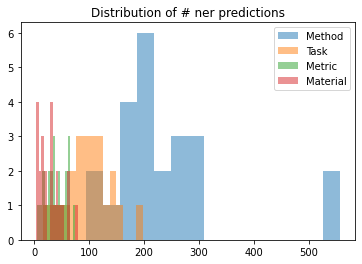

In [197]:
# zero relation docs' ners
distribution_4_types_entities(zero_relation_num_entities)

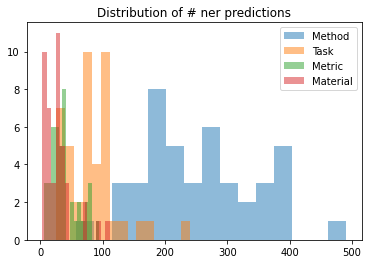

In [198]:
# > 0 relation docs' ners
distribution_4_types_entities(nonzero_relation_num_entities)

# Problem could be in the relation inference scores! => either 0 or ~1

# Look at the errors that the model made when it's over confident

In [349]:
test_gt = pd.read_json(path_or_buf='../../SciREX_yurun/scirex_dataset/release_data/test.jsonl', lines=True)
train_gt = pd.read_json(path_or_buf='../../SciREX_yurun/scirex_dataset/release_data/train.jsonl', lines=True)

In [359]:
train_gt.ner

0      [[0, 5, Method], [6, 8, Task], [14, 17, Task],...
1      [[2, 5, Method], [11, 15, Task], [15, 18, Meth...
2      [[2, 7, Method], [8, 10, Task], [10, 12, Task]...
3      [[2, 7, Task], [20, 24, Task], [25, 28, Method...
4      [[3, 4, Task], [5, 6, Task], [12, 16, Method],...
5      [[2, 7, Task], [12, 16, Method], [16, 19, Task...
6      [[0, 3, Task], [4, 6, Method], [12, 19, Task],...
7      [[0, 3, Method], [4, 7, Method], [16, 19, Meth...
8      [[0, 1, Task], [2, 5, Task], [51, 56, Task], [...
9      [[2, 6, Method], [14, 16, Method], [17, 21, Me...
10     [[2, 3, Task], [4, 8, Task], [25, 33, Method],...
11     [[2, 4, Task], [5, 7, Task], [8, 11, Method], ...
12     [[0, 1, Method], [2, 5, Method], [6, 11, Metho...
13     [[2, 5, Method], [7, 9, Task], [18, 20, Task],...
14     [[14, 17, Method], [18, 19, Method], [40, 44, ...
15     [[0, 6, Task], [8, 10, Method], [22, 25, Task]...
16     [[3, 8, Method], [9, 12, Method], [13, 17, Tas...
17     [[4, 6, Method], [7, 12,

In [343]:
test_gt.ner

0     [[2, 6, Method], [7, 9, Task], [9, 12, Method]...
1     [[8, 11, Method], [21, 23, Task], [62, 66, Met...
2     [[0, 3, Task], [4, 8, Task], [10, 15, Method],...
3     [[3, 11, Task], [16, 21, Method], [24, 27, Met...
4     [[4, 6, Method], [7, 9, Task], [9, 11, Method]...
5     [[2, 3, Method], [4, 15, Method], [59, 62, Met...
6     [[2, 9, Task], [10, 14, Method], [15, 17, Meth...
7     [[2, 3, Method], [4, 10, Method], [16, 21, Tas...
8     [[2, 6, Method], [7, 9, Task], [10, 12, Task],...
9     [[2, 5, Method], [6, 8, Task], [16, 20, Method...
10    [[2, 7, Method], [8, 12, Method], [19, 23, Met...
11    [[0, 5, Task], [6, 13, Method], [22, 24, Metho...
12    [[0, 7, Method], [14, 17, Method], [18, 20, Me...
13    [[2, 4, Method], [19, 21, Method], [24, 26, Me...
14    [[2, 6, Method], [6, 8, Method], [78, 80, Meth...
15    [[2, 5, Task], [6, 10, Method], [11, 13, Metho...
16    [[2, 5, Task], [5, 10, Task], [22, 24, Task], ...
17    [[5, 6, Method], [9, 16, Method], [29, 30,

In [344]:
test_gt[['doc_id', 'n_ary_relations']] # Ground truth

,doc_id,n_ary_relations
0,02567fd428a675ca91a0c6786f47f3e35881bcbd,"[{'Material': 'ChaLearn_2015', 'Method': 'DLDL..."
1,02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,"[{'Material': 'One_Billion_Word', 'Method': 'L..."
2,0398552184f80db111e9c28bf533b395f233ac00,"[{'Material': 'PASCAL_VOC_2007', 'Method': 'Se..."
3,05d2700846c0323f79c1344aca5333994c7c03a5,"[{'Material': 'Switchboard___Hub500', 'Method'..."
4,0626908dd710b91aece1a81f4ca0635f23fc47f3,"[{'Material': 'ImageNet', 'Method': 'Inception..."
5,0678a8abea82793993cd89383319da75f6dc4be3,"[{'Material': 'COCO', 'Method': 'ProNet', 'Met..."
6,081531984770a74e87dbd68907061b4b0f3631bf,"[{'Material': 'Vid4_-_4x_upscaling', 'Method':..."
7,0834e74304b547c9354b6d7da6fa78ef47a48fa8,"[{'Material': 'BlogCatalog', 'Method': 'LINE',..."
8,0a3381f0432c5cfe491c718349d7a44e5814592c,"[{'Material': 'CoNLL-2014_A1', 'Method': 'Bi-L..."
9,0a6c36de8726b6feaab586046ddc1d1a008f44f9,"[{'Material': 'Caltech', 'Method': 'Checkerboa..."


In [264]:
outputs # predicted results with threshold 0.9

,doc_id,predicted_relations
0,02567fd428a675ca91a0c6786f47f3e35881bcbd,"[[[ChaLearn_2015, MAE, Age_Estimation, DLDL_VG..."
1,02b3d1d162080d9aefd3fc30a0bcc9a843073b5d,[]
2,0398552184f80db111e9c28bf533b395f233ac00,[]
3,05d2700846c0323f79c1344aca5333994c7c03a5,"[[[Switchboard___Hub500, Percentage_error, Spe..."
4,0626908dd710b91aece1a81f4ca0635f23fc47f3,[]
5,0678a8abea82793993cd89383319da75f6dc4be3,"[[[COCO, MAP, Weakly_Supervised_Object_Detecti..."
6,081531984770a74e87dbd68907061b4b0f3631bf,[]
7,0834e74304b547c9354b6d7da6fa78ef47a48fa8,[]
8,0a3381f0432c5cfe491c718349d7a44e5814592c,[]
9,0a6c36de8726b6feaab586046ddc1d1a008f44f9,"[[[Caltech, Reasonable_Miss_Rate, Pedestrian_D..."


In [345]:
re_pred_gt = outputs.merge(test_gt[['doc_id', 'n_ary_relations']], on='doc_id', how='inner')

# Failure cases
14318685b5959b51d0f1e3db34643eb2855dc6d9 
Image_net v.s. Image_net_detection


0c47cad9729c38d9db1f75491b1ee4bd883a5d4e 
prediction is Random conbination


44078d0daed8b13114cffb15b368acc467f96351 
score is percentage


38cc89399dd6f5aaab1654f27ab3c9eeade12a36 
score is float

In [601]:
doc_id = '160563abbd75265b19afc8b4169bab9e1eb33d97'

In [602]:
# {"Material": "dataset", "Metric": "metric", "Task": "task", "Method": "model_name"}
list(re_pred_gt.loc[re_pred_gt.doc_id == doc_id]['predicted_relations'])

[[[['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Bitext_Mining',
    'BiLSTM'],
   0.9028,
   1],
  [['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Bitext_Mining',
    'Massively_Multilingual_Sentence_Embeddings'],
   0.9232,
   1],
  [['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Document_Classification',
    'BiLSTM'],
   0.9062,
   1],
  [['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Document_Classification',
    'Massively_Multilingual_Sentence_Embeddings'],
   0.9187000000000001,
   1],
  [['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Natural_Language_Inference',
    'BiLSTM'],
   0.9462,
   1],
  [['BUCC_French-to-English',
    'Accuracy',
    'Cross-Lingual_Natural_Language_Inference',
    'Massively_Multilingual_Sentence_Embeddings'],
   0.9457000000000001,
   1],
  [['BUCC_German-to-English',
    'Accuracy',
    'Cross-Lingual_Bitext_Mining',
    'BiLSTM'],
   0.8894000000000001,
   0],
  [['BUCC_Ge

In [603]:
list(re_pred_gt.loc[re_pred_gt.doc_id == doc_id]['n_ary_relations'])

[[{'Material': 'BUCC_French-to-English',
   'Method': 'Massively_Multilingual_Sentence_Embeddings',
   'Metric': 'F1_score',
   'Task': 'Cross-Lingual_Bitext_Mining',
   'score': '93.91'},
  {'Material': 'BUCC_German-to-English',
   'Method': 'Massively_Multilingual_Sentence_Embeddings',
   'Metric': 'F1_score',
   'Task': 'Cross-Lingual_Bitext_Mining',
   'score': '96.19'},
  {'Material': 'MLDoc_Zero-Shot_English-to-French',
   'Method': 'Massively_Multilingual_Sentence_Embeddings',
   'Metric': 'Accuracy',
   'Task': 'Cross-Lingual_Document_Classification',
   'score': '77.95%'},
  {'Material': 'MLDoc_Zero-Shot_English-to-German',
   'Method': 'Massively_Multilingual_Sentence_Embeddings',
   'Metric': 'Accuracy',
   'Task': 'Cross-Lingual_Document_Classification',
   'score': '84.78%'},
  {'Material': 'MLDoc_Zero-Shot_English-to-Spanish',
   'Method': 'Massively_Multilingual_Sentence_Embeddings',
   'Metric': 'Accuracy',
   'Task': 'Cross-Lingual_Document_Classification',
   'score':

## NER prediction is not a problem

<AxesSubplot:>

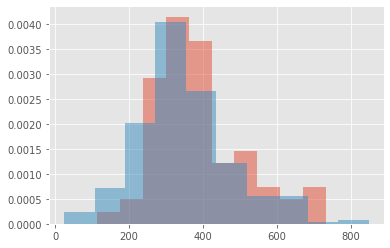

In [604]:
test_gt.ner.apply(len).hist(alpha=0.5, density=1)
train_gt.ner.apply(len).hist(alpha=0.5, density=1)

In [366]:
ners = test_gt
relation_docs = ['0a6c36de8726b6feaab586046ddc1d1a008f44f9']

In [368]:
ner_df

,start_idx,end_idx,type
0,2,5,Method
1,6,8,Task
2,16,20,Method
3,26,33,Method
4,37,40,Method
5,48,50,Method
6,54,56,Method
7,77,78,Material
8,102,104,Metric
9,112,114,Material


In [414]:
def get_num_entities(ners, relation_docs):
    num_entities = dict()
    num_entities['Method'] = []
    num_entities['Task'] = []
    num_entities['Material'] = []
    num_entities['Metric'] = []
    types = ['Method', 'Task', 'Material', 'Metric']
    for doc in relation_docs:
        ners_doc = ners.loc[ners.doc_id == doc].ner
        ner_df = pd.DataFrame(list(ners_doc)[0], columns=['start_idx', 'end_idx', 'type'])
        ner_df_group = ner_df.groupby(['type']).count()['start_idx']

        for type_name in types:  
            if type_name in list(ner_df_group.keys()):
                num_entities[type_name].append(ner_df_group[type_name])
            else:
                num_entities[type_name].append(0)
    return num_entities

In [428]:
num_entities_test_df = pd.DataFrame.from_dict(get_num_entities(test_gt, test_gt.doc_id.unique()))

In [429]:
num_entities_train_df = pd.DataFrame.from_dict(get_num_entities(train_gt, train_gt.doc_id.unique()))

In [432]:
num_entities_train_df

,Method,Task,Material,Metric
0,264,77,21,38
1,102,44,3,13
2,190,70,31,12
3,229,62,5,11
4,240,88,0,7
5,151,88,5,13
6,329,108,19,34
7,224,35,24,76
8,116,142,93,65
9,269,32,9,30


# Check training and testing dataset distributions

<AxesSubplot:>

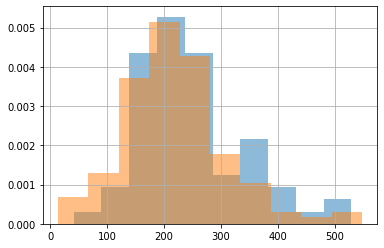

In [434]:
num_entities_test_df.Method.hist(density=1, alpha=0.5)
num_entities_train_df.Method.hist(density=1, alpha=0.5)

<AxesSubplot:>

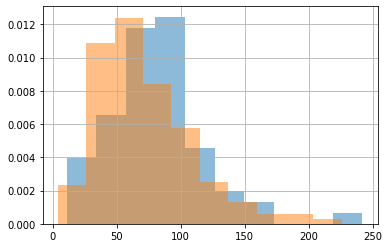

In [435]:
num_entities_test_df.Task.hist(density=1, alpha=0.5)
num_entities_train_df.Task.hist(density=1, alpha=0.5)

<AxesSubplot:>

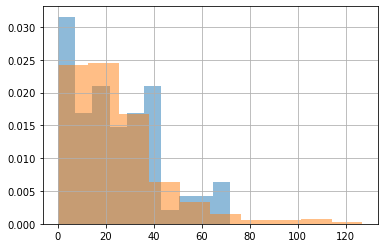

In [436]:
num_entities_test_df.Material.hist(density=1, alpha=0.5)
num_entities_train_df.Material.hist(density=1, alpha=0.5)

<AxesSubplot:>

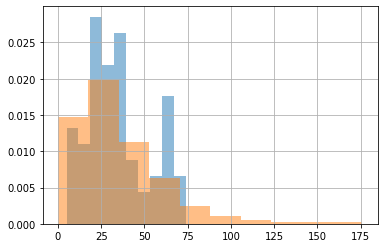

In [437]:
num_entities_test_df.Metric.hist(density=1, alpha=0.5)
num_entities_train_df.Metric.hist(density=1, alpha=0.5)